
| <h1> Hands-on Activity 7.1 </h1> | <h1> Classifications and Regression </h1> |
|--- | --- |
Name: Buan, Danilo Jr. G. <br>
Course and Section: CPE019/CPE32S3 <br>
Date Submitted: 04/05/24 <br>
Instructor: Engr. Roman M. Richard
Date Performed: 04/09/24


#Instructions:

- Choose any dataset applicable to the classification problem, and also, choose any dataset applicable to the regression problem.

- Explain your datasets and the problem being addressed.

- For classification, do the following:

    - Create a base model

    - Evaluate the model with k-fold cross validation
    - Improve the accuracy of your model by applying additional hidden layers
- For regression, do the following:
    - Create a base model
    - Improve the model by standardizing the dataset
    - Show tuning of layers and neurons (see evaluating small and larger networks)
- Submit the link to your Google Colab (make sure that it is accessible to me)

#Classification

For classification, I am going to use the Heart Disease Dataset from Kaggle. The problem I am trying to solve is to classify and identify whether people has a heart disease or he/she is a healthy person.

Dataset link: https://www.kaggle.com/datasets/yasserh/heart-disease-dataset

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from matplotlib import pyplot as plt

In [ ]:
heart_df = pd.read_csv("heart.csv")

##Creating a Base Model
###Data Preprocessing

In [ ]:
print(heart_df.shape)
heart_df.sample(5)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0


In [ ]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
heart_df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

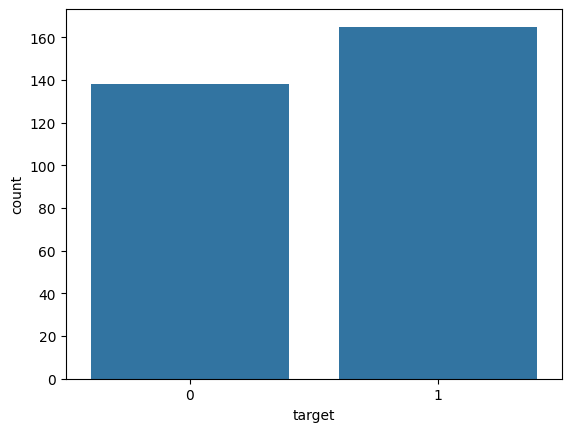

In [ ]:
sns.countplot(x = 'target', data = heart_df) #0 = No present heart disease, 1 = Present heart disease

In [ ]:
X = heart_df.drop(labels = ['target'], axis = 1)
y = heart_df['target'].values

###Splitting the data to Train and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(13,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                168       
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
8/8 [==============================] - 1s 28ms/step - loss: 0.6969 - accuracy: 0.6035 - val_loss: 0.7512 - val_accuracy: 0.6579
Epoch 2/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6788 - accuracy: 0.6123 - val_loss: 0.7264 - val_accuracy: 0.6579
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6598 - accuracy: 0.6256 - val_loss: 0.7067 - val_accuracy: 0.6184
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6428 - accuracy: 0.6520 - val_loss: 0.6879 - val_accuracy: 0.6316
Epoch 5/200
8/8 [==============================] - 0s 10ms/step - loss: 0.6273 - accuracy: 0.6608 - val_loss: 0.6696 - val_accuracy: 0.6579
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6135 - accuracy: 0.6828 - val_loss: 0.6536 - val_accuracy: 0.6579
Epoch 7/200
8/8 [==============================] - 0s 7ms/step - loss: 0.5997 - accuracy: 0.6828 - val_loss: 0.6387 - val_accuracy: 0.6842
Epoch 8/200
8/8 [========

##Now, evaluating the model with KFold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

# Define the base model
def create_base_model():
    model = Sequential([
        Dense(12, input_shape=(13,), activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=SGD(lr=0.003), loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_index, val_index in kfold.split(X_train_norm, y_train):
    X_train_fold, X_val_fold = X_train_norm[train_index], X_train_norm[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create the base model
    model = create_base_model()

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=200, verbose=0)

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(accuracy)

In [ ]:
# Display the accuracy for each fold
for fold, score in enumerate(cv_scores, start=1):
    print(f"Accuracy for fold {fold}: {score}")

# Calculate and display the mean accuracy across all folds
mean_accuracy = np.mean(cv_scores)
print("Mean accuracy over all folds:", mean_accuracy)

Accuracy for fold 1: 0.8478260636329651
Accuracy for fold 2: 0.695652186870575
Accuracy for fold 3: 0.7777777910232544
Accuracy for fold 4: 0.8222222328186035
Accuracy for fold 5: 0.8444444537162781
Mean accuracy over all folds: 0.7975845456123352


##Improving the accuracy by applying additional hidden layers

In [ ]:
def create_improved_model():
    model = Sequential([
        Dense(64, input_shape=(13,), activation="relu"),  # Increase number of neurons in the first hidden layer
        Dense(32, activation="relu"),  # Additional hidden layer with 32 neurons
        Dense(16, activation="relu"),  # Additional hidden layer with 16 neurons
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=SGD(lr=0.003), loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_improved = []

In [ ]:
for train_index, val_index in kfold.split(X_train_norm, y_train):
    X_train_fold, X_val_fold = X_train_norm[train_index], X_train_norm[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create the improved model
    model_improved = create_improved_model()

    # Train the improved model
    history_improved = model_improved.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=200, verbose=0)

    # Evaluate the improved model on the validation set
    _, accuracy_improved = model_improved.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores_improved.append(accuracy_improved)

In [ ]:
# Display the accuracy for each fold
for fold, score in enumerate(cv_scores_improved, start=1):
    print(f"Accuracy for fold {fold} with improved model: {score}")

# Calculate and display the mean accuracy across all folds
mean_accuracy_improved = np.mean(cv_scores_improved)
print("Mean accuracy over all folds with improved model:", mean_accuracy_improved)

Accuracy for fold 1 with improved model: 0.8478260636329651
Accuracy for fold 2 with improved model: 0.6739130616188049
Accuracy for fold 3 with improved model: 0.8222222328186035
Accuracy for fold 4 with improved model: 0.8666666746139526
Accuracy for fold 5 with improved model: 0.800000011920929
Mean accuracy over all folds with improved model: 0.802125608921051


Observation: After performing the second KFold cross-validation with multiple hidden layers, the mean accuracy slightly increased to 0.802125 from 0.79758. This suggests that the added complexity from the additional hidden layers enabled the model to capture more nuanced patterns in the data, resulting in a modest enhancement in performance.

#Regression

For regression, I am going to use the Housing Price Prediction from Kaggle. The problem I am trying to solve is to predict the prices of houses based on its features.

Dataset link: https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data

##Creating a base model

#Data preprocessing

In [78]:
houseprice_df = pd.read_csv('housing_price_dataset.csv')

print(houseprice_df.shape)
houseprice_df.sample(5)

(50000, 6)


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
5764,1406,3,3,Suburb,1995,99109.375236
26896,2505,2,1,Urban,1951,296691.116039
15698,2784,3,2,Rural,1992,333022.470318
22557,2643,3,3,Rural,1976,296594.696025
16479,1256,5,1,Suburb,1959,40834.875327


In [79]:
houseprice_df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [80]:
categorical_cols = ['Neighborhood']

label_encoder = LabelEncoder()

for col in categorical_cols:
    houseprice_df[col] = label_encoder.fit_transform(houseprice_df[col])

In [81]:
X = houseprice_df.drop('Price', axis = 1)
y = houseprice_df["Price"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [83]:
print("Feature matrix:", X_train.shape)
print("Target matrix:", X_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (40000, 5)
Target matrix: (10000, 5)
Feature matrix: (40000,)
Target matrix: (10000,)


###Standardizing the dataset

In [84]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [60]:
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

In [61]:
y_train_scaled = normalizer.fit_transform(y_train_reshaped)
y_test_scaled = normalizer.transform(y_test_reshaped)

###Showing the tuning of layers and neurons

In [62]:
model_small  = Sequential([
    Dense(64, input_shape=(5,), activation="relu"),
    Dense(1, activation="linear")
])

model_large = Sequential([
    Dense(128, input_shape=(5,), activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="linear")
])

model_small.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_large.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [63]:
model_small.summary()
model_large.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                384       
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 449 (1.75 KB)
Trainable params: 449 (1.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               768       
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 d

In [64]:
history = model_small.fit(X_train_norm, y_train_scaled, validation_split = 0.2, epochs = 200)

Epoch 1/200
1000/1000 [==============================] - 3s 2ms/step - loss: 0.4523 - mae: 0.5356 - val_loss: 0.4368 - val_mae: 0.5301
Epoch 2/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4334 - mae: 0.5254 - val_loss: 0.4328 - val_mae: 0.5280
Epoch 3/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4325 - mae: 0.5252 - val_loss: 0.4376 - val_mae: 0.5318
Epoch 4/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4321 - mae: 0.5245 - val_loss: 0.4351 - val_mae: 0.5298
Epoch 5/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4320 - mae: 0.5249 - val_loss: 0.4358 - val_mae: 0.5296
Epoch 6/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4316 - mae: 0.5244 - val_loss: 0.4353 - val_mae: 0.5299
Epoch 7/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4311 - mae: 0.5242 - val_loss: 0.4417 - val_mae: 0.5328
Epoch 8/200
1000/1000 [==============================] 

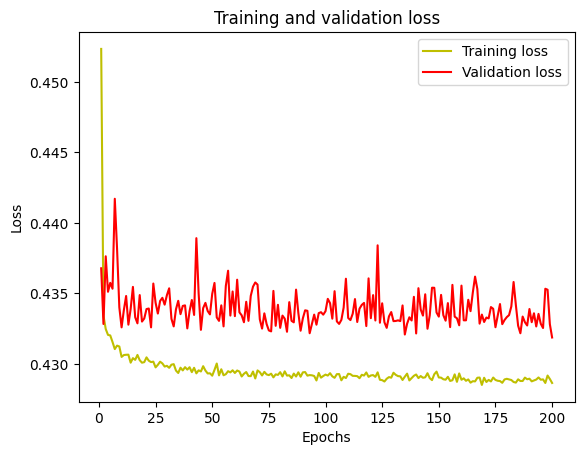

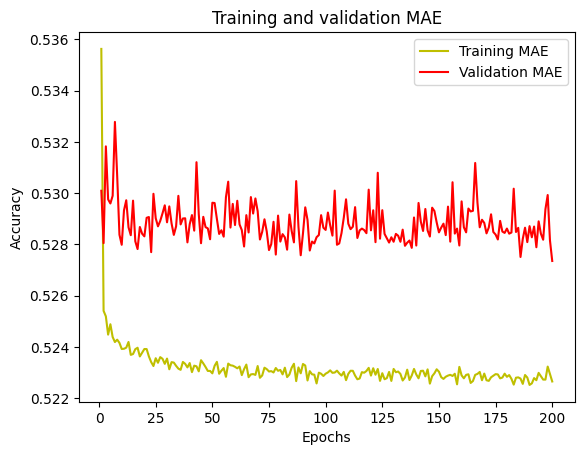

In [65]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
history2 = model_large.fit(X_train_norm, y_train_scaled, validation_split = 0.2, epochs = 200)

Epoch 1/200
1000/1000 [==============================] - 4s 3ms/step - loss: 0.4453 - mae: 0.5322 - val_loss: 0.4381 - val_mae: 0.5311
Epoch 2/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4355 - mae: 0.5271 - val_loss: 0.4354 - val_mae: 0.5295
Epoch 3/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4341 - mae: 0.5262 - val_loss: 0.4347 - val_mae: 0.5295
Epoch 4/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4328 - mae: 0.5248 - val_loss: 0.4356 - val_mae: 0.5294
Epoch 5/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4327 - mae: 0.5255 - val_loss: 0.4336 - val_mae: 0.5286
Epoch 6/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4322 - mae: 0.5244 - val_loss: 0.4362 - val_mae: 0.5297
Epoch 7/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4324 - mae: 0.5249 - val_loss: 0.4334 - val_mae: 0.5284
Epoch 8/200
1000/1000 [==============================] 

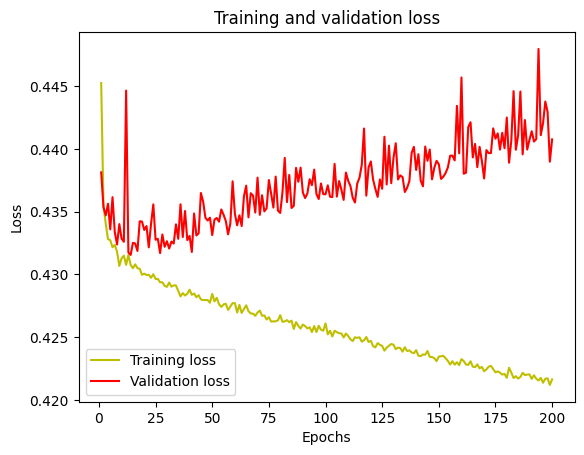

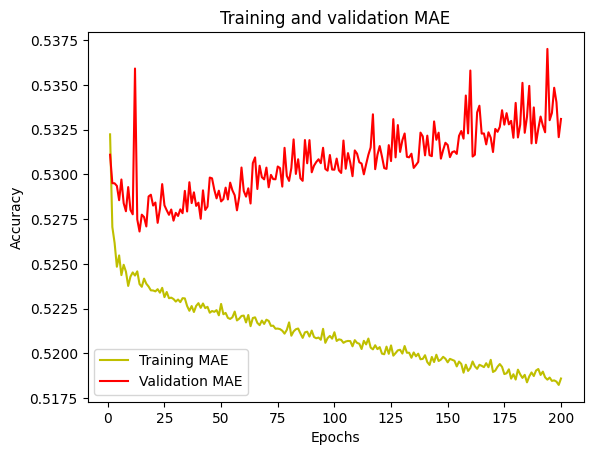

In [71]:
#plot the training and validation accuracy and loss at each epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history2.history['mae']
val_acc = history2.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [73]:
#Predict on test data
predictions = model_small.predict(X_test_norm[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test_scaled[:5])

1/1 [==============================] - 0s 89ms/step
Predicted values are:  [[-0.56580746]
 [-0.62833154]
 [-0.72185   ]
 [ 0.93498266]
 [ 0.71752024]]
Real values are:  [[-0.89397409]
 [ 0.61127952]
 [-0.23291504]
 [ 1.27420456]
 [ 1.02880344]]


In [74]:
#Predict on test data
predictions = model_large.predict(X_test_norm[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test_scaled[:5])

1/1 [==============================] - 0s 115ms/step
Predicted values are:  [[-0.4948083 ]
 [-0.33963886]
 [-0.7104574 ]
 [ 1.0574237 ]
 [ 0.5933097 ]]
Real values are:  [[-0.89397409]
 [ 0.61127952]
 [-0.23291504]
 [ 1.27420456]
 [ 1.02880344]]


In [76]:
#Neural network - from the current code
mse_neural, mae_neural = model_small.evaluate(X_test_norm, y_test_scaled)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

313/313 [==============================] - 2s 4ms/step - loss: 0.4402 - mae: 0.5297
Mean squared error from neural net:  0.4402224123477936
Mean absolute error from neural net:  0.5297252535820007


In [77]:
#Neural network - from the current code
mse_neural, mae_neural = model_large.evaluate(X_test_norm, y_test_scaled)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

313/313 [==============================] - 1s 2ms/step - loss: 0.4496 - mae: 0.5357
Mean squared error from neural net:  0.44960230588912964
Mean absolute error from neural net:  0.535699188709259


Now, I will try to create the model without standardizing the values of our target variable `'Price'` which is `'y'`.

In [85]:
model_small  = Sequential([
    Dense(64, input_shape=(5,), activation="relu"),
    Dense(1, activation="linear")
])

model_large = Sequential([
    Dense(128, input_shape=(5,), activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="linear")
])

model_small.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_large.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [87]:
history3 = model_small.fit(X_train_norm, y_train, validation_split = 0.2, epochs = 200)

Epoch 1/200
1000/1000 [==============================] - 3s 3ms/step - loss: 56215019520.0000 - mae: 224646.3906 - val_loss: 56665104384.0000 - val_mae: 225469.6250
Epoch 2/200
1000/1000 [==============================] - 4s 4ms/step - loss: 56084631552.0000 - mae: 224388.7344 - val_loss: 56478261248.0000 - val_mae: 225104.3438
Epoch 3/200
1000/1000 [==============================] - 4s 4ms/step - loss: 55852904448.0000 - mae: 223934.6875 - val_loss: 56203231232.0000 - val_mae: 224568.2500
Epoch 4/200
1000/1000 [==============================] - 4s 4ms/step - loss: 55542865920.0000 - mae: 223327.5000 - val_loss: 55857078272.0000 - val_mae: 223892.9219
Epoch 5/200
1000/1000 [==============================] - 5s 5ms/step - loss: 55165591552.0000 - mae: 222586.6875 - val_loss: 55446175744.0000 - val_mae: 223089.2500
Epoch 6/200
1000/1000 [==============================] - 4s 4ms/step - loss: 54725709824.0000 - mae: 221720.9375 - val_loss: 54974156800.0000 - val_mae: 222163.2969
Epoch 7/20

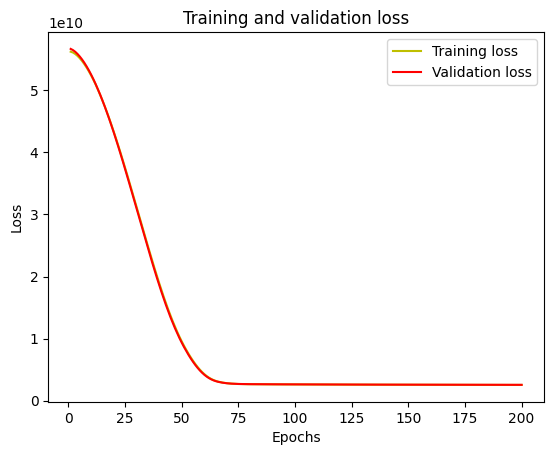

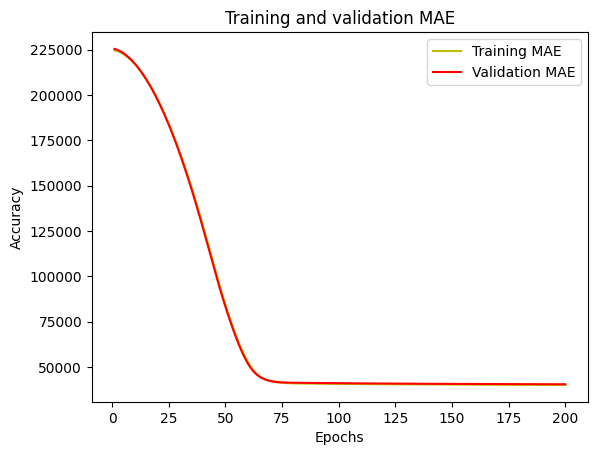

In [89]:
#plot the training and validation accuracy and loss at each epoch
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history3.history['mae']
val_acc = history3.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [90]:
history2 = model_large.fit(X_train_norm, y_train, validation_split = 0.2, epochs = 200)

Epoch 1/200
1000/1000 [==============================] - 3s 3ms/step - loss: 51955408896.0000 - mae: 215717.7969 - val_loss: 40731729920.0000 - val_mae: 191144.7188
Epoch 2/200
1000/1000 [==============================] - 2s 2ms/step - loss: 21073870848.0000 - mae: 130044.3672 - val_loss: 7092168192.0000 - val_mae: 70547.1562
Epoch 3/200
1000/1000 [==============================] - 2s 2ms/step - loss: 4075015168.0000 - mae: 51014.1680 - val_loss: 2914614528.0000 - val_mae: 43176.4258
Epoch 4/200
1000/1000 [==============================] - 2s 2ms/step - loss: 2775624704.0000 - mae: 42047.6797 - val_loss: 2726760960.0000 - val_mae: 41911.9102
Epoch 5/200
1000/1000 [==============================] - 2s 2ms/step - loss: 2703266304.0000 - mae: 41490.7656 - val_loss: 2693693440.0000 - val_mae: 41681.6016
Epoch 6/200
1000/1000 [==============================] - 2s 2ms/step - loss: 2673245952.0000 - mae: 41263.3633 - val_loss: 2666924544.0000 - val_mae: 41480.6719
Epoch 7/200
1000/1000 [=====

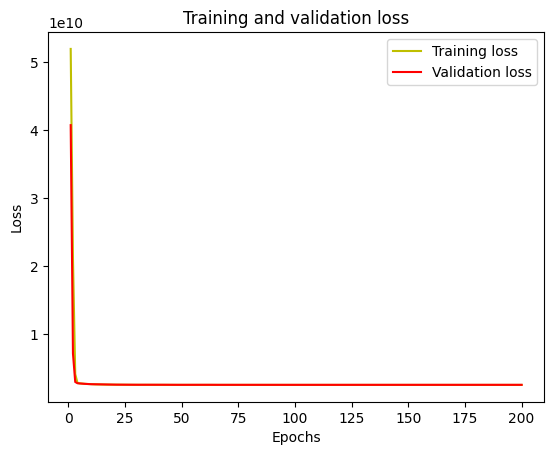

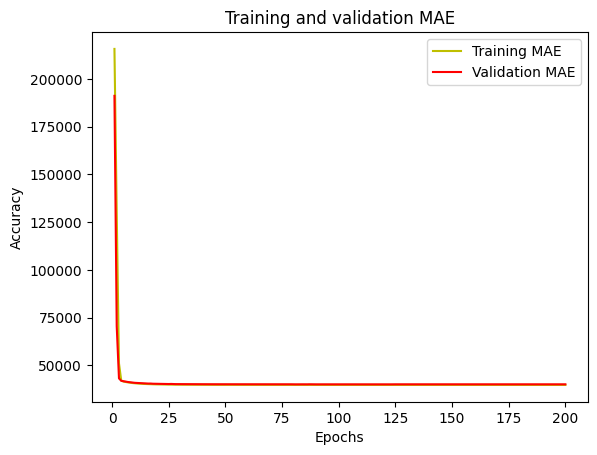

In [91]:
#plot the training and validation accuracy and loss at each epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history2.history['mae']
val_acc = history2.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:
#Predict on test data
predictions = model_small.predict(X_test_norm[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 53ms/step
Predicted values are:  [[193776.98]
 [176456.86]
 [170836.36]
 [292226.03]
 [279492.34]]
Real values are:  18991    156943.906601
41632    271308.869122
36306    207169.325745
26881    321676.061172
3469     303031.169823
Name: Price, dtype: float64


In [93]:
#Predict on test data
predictions = model_large.predict(X_test_norm[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 58ms/step
Predicted values are:  [[184302.38]
 [177346.66]
 [167753.75]
 [294976.6 ]
 [280897.8 ]]
Real values are:  18991    156943.906601
41632    271308.869122
36306    207169.325745
26881    321676.061172
3469     303031.169823
Name: Price, dtype: float64


In [94]:
#Neural network - from the current code
mse_neural, mae_neural = model_small.evaluate(X_test_norm, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

313/313 [==============================] - 1s 1ms/step - loss: 2580056576.0000 - mae: 40571.8789
Mean squared error from neural net:  2580056576.0
Mean absolute error from neural net:  40571.87890625


In [95]:
#Neural network - from the current code
mse_neural, mae_neural = model_large.evaluate(X_test_norm, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

313/313 [==============================] - 1s 1ms/step - loss: 2537459456.0000 - mae: 40257.2227
Mean squared error from neural net:  2537459456.0
Mean absolute error from neural net:  40257.22265625


#Conclusion

- After performing this activity, I evaluated the performance of the neural network model for predicting whether a person has a risk for heart disease, as well as predicting housing prices. For the heart disease prediction task, the model's performance was assessed using KFold Cross Validation. Subsequently, for the housing price prediction task, I analyzed the model's performance using mean squared error (MSE) and mean absolute error (MAE) metrics. For the first part, I achieved an accuracy of 0.80212 in the KFold Cross-validation. In the second part, I explored two methods. The first method involved standardizing the y dataset, resulting in mean squared errors of 0.4402 (model_small) and 0.4496 (model_large). Meanwhile, the second method did not involve standardizing the y dataset, yielding mean absolute errors of 40571.84 (model_small) and 40257.22 (model_large).